In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# parameters
N = 1000
T = 120
sigma_m = 0.20
sigma_e = 0.1
mu = 0.05

r_m = np.random.normal(mu/12, sigma_m/np.sqrt(12), size=(T, 1))
eps_i = np.random.normal(0, sigma_e/np.sqrt(12), size = (T, N))


(120, 1000)


In [ ]:
r_i = 0 + r_m + eps_i

r_m_const = sm.add_constant(r_m)

alpha = np.zeros(N)
beta = np.zeros(N)
tstats = np.zeros(N)
pvalues = np.zeros(N)
residuals = np.zeros((T, N))

for i in range(N):
    model = sm.OLS(r_i[:, i], r_m_const)
    results = model.fit()
    alpha[i] = results.params[0]
    beta[i] = results.params[1]
    tstats[i] = results.tvalues[0]
    pvalues[i] = results.pvalues[0]
    residuals[:,i] = results.resid
#pvalue_vector = np.where(pvalues > 0.1, 1, 0)


In [ ]:
B = 100
bs_returns = np.zeros((T, N, B))
alpha_bs = np.zeros((N, B))
beta_bs = np.zeros((N, B))
tstats_bs = np.zeros((N, B))
pvalues_bs = np.zeros((N, B))
residuals_bs = np.zeros((T, N, B))

for b in range(B):
  bs = np.random.choice(range(T), T, replace=True)


  for i in range(N):
    bs_returns[:,i, b] = beta[i]*np.reshape(r_m[bs], (T,)) + residuals[bs, i]


  for i in range(N):
    model = sm.OLS(bs_returns[:, i, b], r_m_const[bs, :])
    results = model.fit()
    alpha_bs[i, b] = results.params[0]
    beta_bs[i, b] = results.params[1]
    tstats_bs[i, b] = results.tvalues[0]
    pvalues_bs[i, b] = results.pvalues[0]
    residuals_bs[:,i, b] = results.resid

bs_t_cdf = np.mean(np.sort(tstats_bs, axis = 0), axis = 1)

plt.plot(bs_t_cdf, (np.arange(N) +1)/N, color = "blue")
plt.plot(np.sort(tstats), (np.arange(N) +1)/N, color = "red")
plt.xlabel('t-statistic')
plt.ylabel('Cumulative Distribution Function')
plt.title('alpha = 0, lambda = 0')
plt.show()

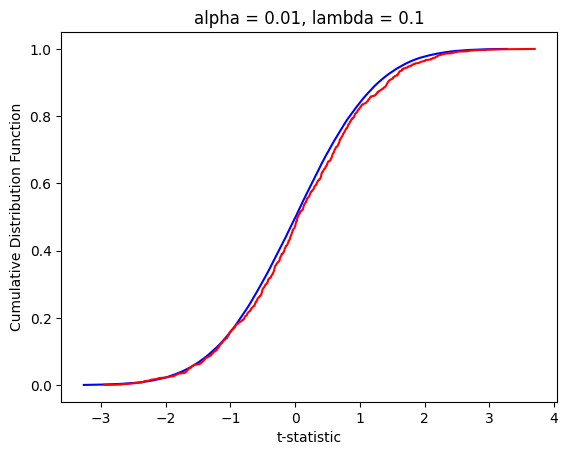

In [ ]:
lam = .1
alph = 0.01
alpha_i = np.concatenate([alph/12*np.ones((1,round(lam*N))), np.zeros((1,round((1-lam)*N)))], axis = 1)
r_i = alpha_i + r_m + eps_i


for i in range(N):
    model = sm.OLS(r_i[:, i], r_m_const)
    results = model.fit()
    alpha[i] = results.params[0]
    beta[i] = results.params[1]
    tstats[i] = results.tvalues[0]
    pvalues[i] = results.pvalues[0]
    residuals[:,i] = results.resid

for b in range(B):
  bs = np.random.choice(range(T), T, replace=True)

  for i in range(N):
    bs_returns[:,i, b] = beta[i]*np.reshape(r_m[bs], (T,)) + residuals[bs, i]


  for i in range(N):
    model = sm.OLS(bs_returns[:, i, b], r_m_const[bs, :])
    results = model.fit()
    alpha_bs[i, b] = results.params[0]
    beta_bs[i, b] = results.params[1]
    tstats_bs[i, b] = results.tvalues[0]
    pvalues_bs[i, b] = results.pvalues[0]
    residuals_bs[:,i, b] = results.resid

bs_t_cdf = np.mean(np.sort(tstats_bs, axis = 0), axis = 1)

plt.plot(bs_t_cdf, (np.arange(N) +1)/N, color = "blue")
plt.plot(np.sort(tstats), (np.arange(N) +1)/N, color = "red")
plt.xlabel('t-statistic')
plt.ylabel('Cumulative Distribution Function')
plt.title('alpha = 0.01, lambda = 0.1')
plt.show()

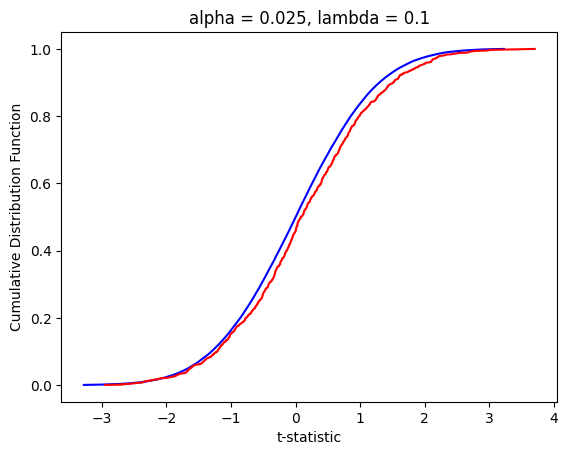

In [ ]:
lam = .1
alph = 0.025
alpha_i = np.concatenate([alph/12*np.ones((1,round(lam*N))), np.zeros((1,round((1-lam)*N)))], axis = 1)
r_i = alpha_i + r_m + eps_i


for i in range(N):
    model = sm.OLS(r_i[:, i], r_m_const)
    results = model.fit()
    alpha[i] = results.params[0]
    beta[i] = results.params[1]
    tstats[i] = results.tvalues[0]
    pvalues[i] = results.pvalues[0]
    residuals[:,i] = results.resid

for b in range(B):
  bs = np.random.choice(range(T), T, replace=True)

  for i in range(N):
    bs_returns[:,i, b] = beta[i]*np.reshape(r_m[bs], (T,)) + residuals[bs, i]


  for i in range(N):
    model = sm.OLS(bs_returns[:, i, b], r_m_const[bs, :])
    results = model.fit()
    alpha_bs[i, b] = results.params[0]
    beta_bs[i, b] = results.params[1]
    tstats_bs[i, b] = results.tvalues[0]
    pvalues_bs[i, b] = results.pvalues[0]
    residuals_bs[:,i, b] = results.resid

bs_t_cdf = np.mean(np.sort(tstats_bs, axis = 0), axis = 1)

plt.plot(bs_t_cdf, (np.arange(N) +1)/N, color = "blue")
plt.plot(np.sort(tstats), (np.arange(N) +1)/N, color = "red")
plt.xlabel('t-statistic')
plt.ylabel('Cumulative Distribution Function')
plt.title('alpha = 0.025, lambda = 0.1')
plt.show()

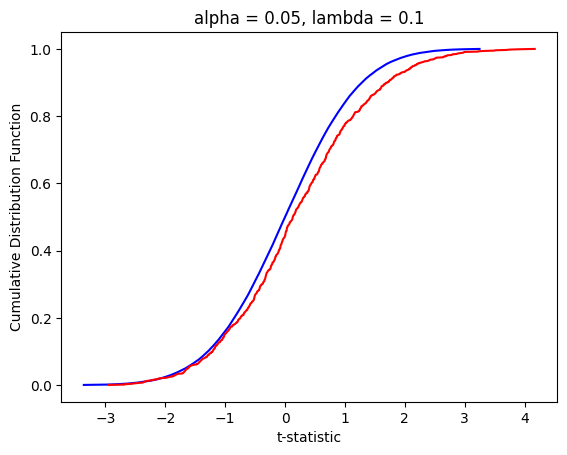

In [ ]:
lam = .1
alph = 0.05
alpha_i = np.concatenate([alph/12*np.ones((1,round(lam*N))), np.zeros((1,round((1-lam)*N)))], axis = 1)
r_i = alpha_i + r_m + eps_i


for i in range(N):
    model = sm.OLS(r_i[:, i], r_m_const)
    results = model.fit()
    alpha[i] = results.params[0]
    beta[i] = results.params[1]
    tstats[i] = results.tvalues[0]
    pvalues[i] = results.pvalues[0]
    residuals[:,i] = results.resid

for b in range(B):
  bs = np.random.choice(range(T), T, replace=True)

  for i in range(N):
    bs_returns[:,i, b] = beta[i]*np.reshape(r_m[bs], (T,)) + residuals[bs, i]


  for i in range(N):
    model = sm.OLS(bs_returns[:, i, b], r_m_const[bs, :])
    results = model.fit()
    alpha_bs[i, b] = results.params[0]
    beta_bs[i, b] = results.params[1]
    tstats_bs[i, b] = results.tvalues[0]
    pvalues_bs[i, b] = results.pvalues[0]
    residuals_bs[:,i, b] = results.resid

bs_t_cdf = np.mean(np.sort(tstats_bs, axis = 0), axis = 1)

plt.plot(bs_t_cdf, (np.arange(N) +1)/N, color = "blue")
plt.plot(np.sort(tstats), (np.arange(N) +1)/N, color = "red")
plt.xlabel('t-statistic')
plt.ylabel('Cumulative Distribution Function')
plt.title('alpha = 0.05, lambda = 0.1')
plt.show()

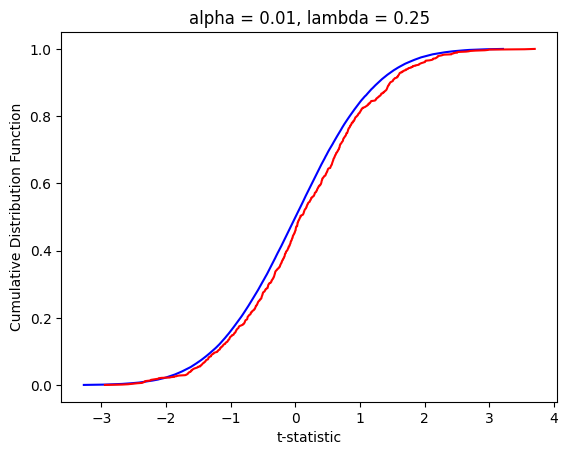

In [ ]:
lam = .25
alph = 0.01
alpha_i = np.concatenate([alph/12*np.ones((1,round(lam*N))), np.zeros((1,round((1-lam)*N)))], axis = 1)
r_i = alpha_i + r_m + eps_i


for i in range(N):
    model = sm.OLS(r_i[:, i], r_m_const)
    results = model.fit()
    alpha[i] = results.params[0]
    beta[i] = results.params[1]
    tstats[i] = results.tvalues[0]
    pvalues[i] = results.pvalues[0]
    residuals[:,i] = results.resid

for b in range(B):
  bs = np.random.choice(range(T), T, replace=True)

  for i in range(N):
    bs_returns[:,i, b] = beta[i]*np.reshape(r_m[bs], (T,)) + residuals[bs, i]


  for i in range(N):
    model = sm.OLS(bs_returns[:, i, b], r_m_const[bs, :])
    results = model.fit()
    alpha_bs[i, b] = results.params[0]
    beta_bs[i, b] = results.params[1]
    tstats_bs[i, b] = results.tvalues[0]
    pvalues_bs[i, b] = results.pvalues[0]
    residuals_bs[:,i, b] = results.resid

bs_t_cdf = np.mean(np.sort(tstats_bs, axis = 0), axis = 1)

plt.plot(bs_t_cdf, (np.arange(N) +1)/N, color = "blue")
plt.plot(np.sort(tstats), (np.arange(N) +1)/N, color = "red")
plt.xlabel('t-statistic')
plt.ylabel('Cumulative Distribution Function')
plt.title('alpha = 0.01, lambda = 0.25')
plt.show()

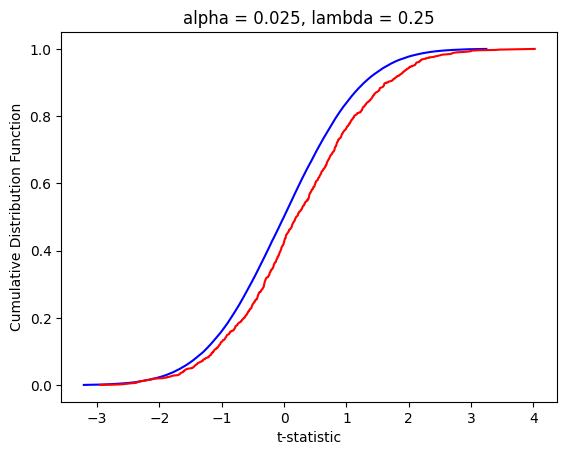

In [ ]:
lam = .25
alph = 0.025
alpha_i = np.concatenate([alph/12*np.ones((1,round(lam*N))), np.zeros((1,round((1-lam)*N)))], axis = 1)
r_i = alpha_i + r_m + eps_i


for i in range(N):
    model = sm.OLS(r_i[:, i], r_m_const)
    results = model.fit()
    alpha[i] = results.params[0]
    beta[i] = results.params[1]
    tstats[i] = results.tvalues[0]
    pvalues[i] = results.pvalues[0]
    residuals[:,i] = results.resid

for b in range(B):
  bs = np.random.choice(range(T), T, replace=True)

  for i in range(N):
    bs_returns[:,i, b] = beta[i]*np.reshape(r_m[bs], (T,)) + residuals[bs, i]


  for i in range(N):
    model = sm.OLS(bs_returns[:, i, b], r_m_const[bs, :])
    results = model.fit()
    alpha_bs[i, b] = results.params[0]
    beta_bs[i, b] = results.params[1]
    tstats_bs[i, b] = results.tvalues[0]
    pvalues_bs[i, b] = results.pvalues[0]
    residuals_bs[:,i, b] = results.resid

bs_t_cdf = np.mean(np.sort(tstats_bs, axis = 0), axis = 1)

plt.plot(bs_t_cdf, (np.arange(N) +1)/N, color = "blue")
plt.plot(np.sort(tstats), (np.arange(N) +1)/N, color = "red")
plt.xlabel('t-statistic')
plt.ylabel('Cumulative Distribution Function')
plt.title('alpha = 0.025, lambda = 0.25')
plt.show()

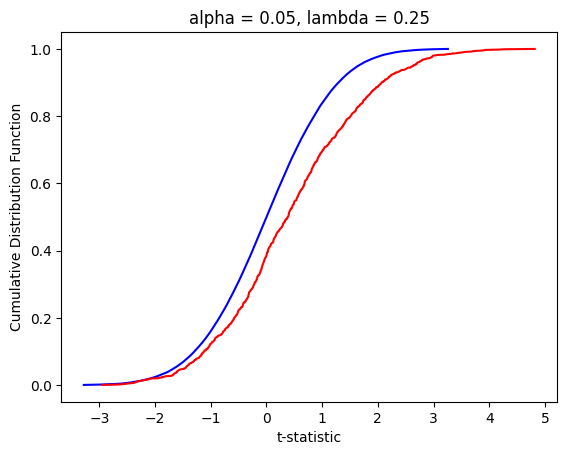

In [ ]:
lam = .25
alph = 0.05
alpha_i = np.concatenate([alph/12*np.ones((1,round(lam*N))), np.zeros((1,round((1-lam)*N)))], axis = 1)
r_i = alpha_i + r_m + eps_i


for i in range(N):
    model = sm.OLS(r_i[:, i], r_m_const)
    results = model.fit()
    alpha[i] = results.params[0]
    beta[i] = results.params[1]
    tstats[i] = results.tvalues[0]
    pvalues[i] = results.pvalues[0]
    residuals[:,i] = results.resid

for b in range(B):
  bs = np.random.choice(range(T), T, replace=True)

  for i in range(N):
    bs_returns[:,i, b] = beta[i]*np.reshape(r_m[bs], (T,)) + residuals[bs, i]


  for i in range(N):
    model = sm.OLS(bs_returns[:, i, b], r_m_const[bs, :])
    results = model.fit()
    alpha_bs[i, b] = results.params[0]
    beta_bs[i, b] = results.params[1]
    tstats_bs[i, b] = results.tvalues[0]
    pvalues_bs[i, b] = results.pvalues[0]
    residuals_bs[:,i, b] = results.resid

bs_t_cdf = np.mean(np.sort(tstats_bs, axis = 0), axis = 1)

plt.plot(bs_t_cdf, (np.arange(N) +1)/N, color = "blue")
plt.plot(np.sort(tstats), (np.arange(N) +1)/N, color = "red")
plt.xlabel('t-statistic')
plt.ylabel('Cumulative Distribution Function')
plt.title('alpha = 0.05, lambda = 0.25')
plt.show()

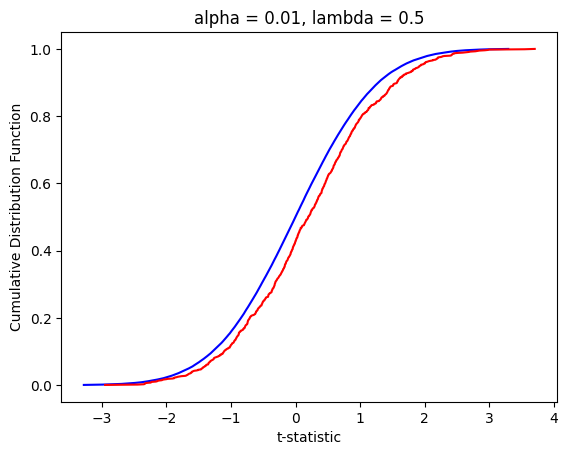

In [ ]:
lam = .5
alph = 0.01
alpha_i = np.concatenate([alph/12*np.ones((1,round(lam*N))), np.zeros((1,round((1-lam)*N)))], axis = 1)
r_i = alpha_i + r_m + eps_i


for i in range(N):
    model = sm.OLS(r_i[:, i], r_m_const)
    results = model.fit()
    alpha[i] = results.params[0]
    beta[i] = results.params[1]
    tstats[i] = results.tvalues[0]
    pvalues[i] = results.pvalues[0]
    residuals[:,i] = results.resid

for b in range(B):
  bs = np.random.choice(range(T), T, replace=True)

  for i in range(N):
    bs_returns[:,i, b] = beta[i]*np.reshape(r_m[bs], (T,)) + residuals[bs, i]


  for i in range(N):
    model = sm.OLS(bs_returns[:, i, b], r_m_const[bs, :])
    results = model.fit()
    alpha_bs[i, b] = results.params[0]
    beta_bs[i, b] = results.params[1]
    tstats_bs[i, b] = results.tvalues[0]
    pvalues_bs[i, b] = results.pvalues[0]
    residuals_bs[:,i, b] = results.resid

bs_t_cdf = np.mean(np.sort(tstats_bs, axis = 0), axis = 1)

plt.plot(bs_t_cdf, (np.arange(N) +1)/N, color = "blue")
plt.plot(np.sort(tstats), (np.arange(N) +1)/N, color = "red")
plt.xlabel('t-statistic')
plt.ylabel('Cumulative Distribution Function')
plt.title('alpha = 0.01, lambda = 0.5')
plt.show()

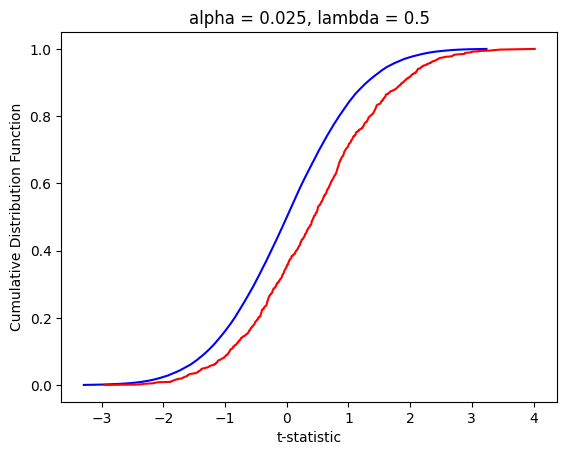

In [ ]:
lam = .5
alph = 0.025
alpha_i = np.concatenate([alph/12*np.ones((1,round(lam*N))), np.zeros((1,round((1-lam)*N)))], axis = 1)
r_i = alpha_i + r_m + eps_i


for i in range(N):
    model = sm.OLS(r_i[:, i], r_m_const)
    results = model.fit()
    alpha[i] = results.params[0]
    beta[i] = results.params[1]
    tstats[i] = results.tvalues[0]
    pvalues[i] = results.pvalues[0]
    residuals[:,i] = results.resid

for b in range(B):
  bs = np.random.choice(range(T), T, replace=True)

  for i in range(N):
    bs_returns[:,i, b] = beta[i]*np.reshape(r_m[bs], (T,)) + residuals[bs, i]


  for i in range(N):
    model = sm.OLS(bs_returns[:, i, b], r_m_const[bs, :])
    results = model.fit()
    alpha_bs[i, b] = results.params[0]
    beta_bs[i, b] = results.params[1]
    tstats_bs[i, b] = results.tvalues[0]
    pvalues_bs[i, b] = results.pvalues[0]
    residuals_bs[:,i, b] = results.resid

bs_t_cdf = np.mean(np.sort(tstats_bs, axis = 0), axis = 1)

plt.plot(bs_t_cdf, (np.arange(N) +1)/N, color = "blue")
plt.plot(np.sort(tstats), (np.arange(N) +1)/N, color = "red")
plt.xlabel('t-statistic')
plt.ylabel('Cumulative Distribution Function')
plt.title('alpha = 0.025, lambda = 0.5')
plt.show()

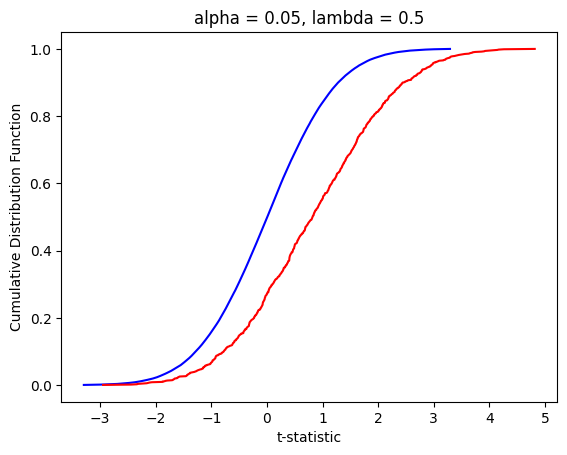

In [ ]:
lam = .5
alph = 0.05
alpha_i = np.concatenate([alph/12*np.ones((1,round(lam*N))), np.zeros((1,round((1-lam)*N)))], axis = 1)
r_i = alpha_i + r_m + eps_i


for i in range(N):
    model = sm.OLS(r_i[:, i], r_m_const)
    results = model.fit()
    alpha[i] = results.params[0]
    beta[i] = results.params[1]
    tstats[i] = results.tvalues[0]
    pvalues[i] = results.pvalues[0]
    residuals[:,i] = results.resid

for b in range(B):
  bs = np.random.choice(range(T), T, replace=True)

  for i in range(N):
    bs_returns[:,i, b] = beta[i]*np.reshape(r_m[bs], (T,)) + residuals[bs, i]


  for i in range(N):
    model = sm.OLS(bs_returns[:, i, b], r_m_const[bs, :])
    results = model.fit()
    alpha_bs[i, b] = results.params[0]
    beta_bs[i, b] = results.params[1]
    tstats_bs[i, b] = results.tvalues[0]
    pvalues_bs[i, b] = results.pvalues[0]
    residuals_bs[:,i, b] = results.resid

bs_t_cdf = np.mean(np.sort(tstats_bs, axis = 0), axis = 1)

plt.plot(bs_t_cdf, (np.arange(N) +1)/N, color = "blue")
plt.plot(np.sort(tstats), (np.arange(N) +1)/N, color = "red")
plt.xlabel('t-statistic')
plt.ylabel('Cumulative Distribution Function')
plt.title('alpha = 0.05, lambda = 0.5')
plt.show()

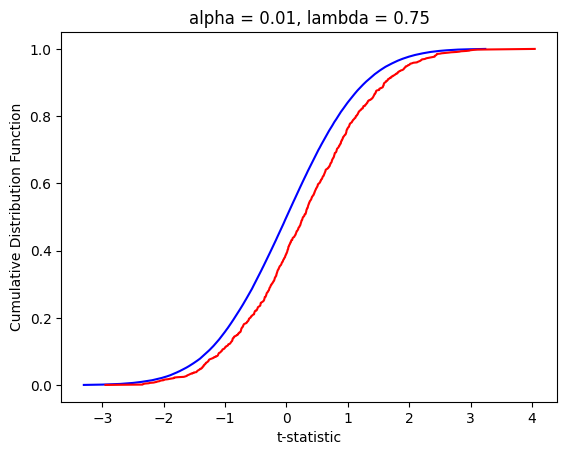

In [ ]:
lam = .75
alph = 0.01
alpha_i = np.concatenate([alph/12*np.ones((1,round(lam*N))), np.zeros((1,round((1-lam)*N)))], axis = 1)
r_i = alpha_i + r_m + eps_i


for i in range(N):
    model = sm.OLS(r_i[:, i], r_m_const)
    results = model.fit()
    alpha[i] = results.params[0]
    beta[i] = results.params[1]
    tstats[i] = results.tvalues[0]
    pvalues[i] = results.pvalues[0]
    residuals[:,i] = results.resid

for b in range(B):
  bs = np.random.choice(range(T), T, replace=True)

  for i in range(N):
    bs_returns[:,i, b] = beta[i]*np.reshape(r_m[bs], (T,)) + residuals[bs, i]


  for i in range(N):
    model = sm.OLS(bs_returns[:, i, b], r_m_const[bs, :])
    results = model.fit()
    alpha_bs[i, b] = results.params[0]
    beta_bs[i, b] = results.params[1]
    tstats_bs[i, b] = results.tvalues[0]
    pvalues_bs[i, b] = results.pvalues[0]
    residuals_bs[:,i, b] = results.resid

bs_t_cdf = np.mean(np.sort(tstats_bs, axis = 0), axis = 1)

plt.plot(bs_t_cdf, (np.arange(N) +1)/N, color = "blue")
plt.plot(np.sort(tstats), (np.arange(N) +1)/N, color = "red")
plt.xlabel('t-statistic')
plt.ylabel('Cumulative Distribution Function')
plt.title('alpha = 0.01, lambda = 0.75')
plt.show()

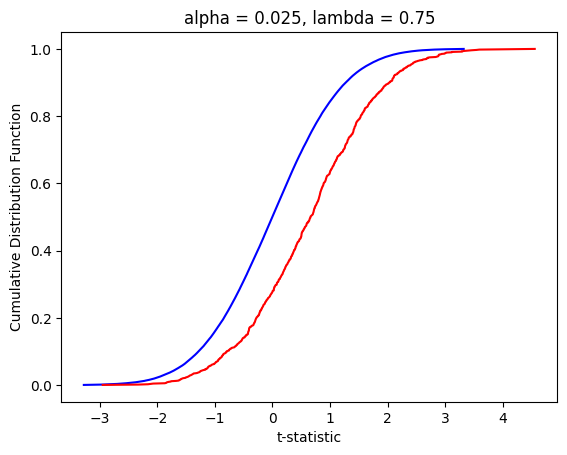

In [ ]:
lam = .75
alph = 0.025
alpha_i = np.concatenate([alph/12*np.ones((1,round(lam*N))), np.zeros((1,round((1-lam)*N)))], axis = 1)
r_i = alpha_i + r_m + eps_i


for i in range(N):
    model = sm.OLS(r_i[:, i], r_m_const)
    results = model.fit()
    alpha[i] = results.params[0]
    beta[i] = results.params[1]
    tstats[i] = results.tvalues[0]
    pvalues[i] = results.pvalues[0]
    residuals[:,i] = results.resid

for b in range(B):
  bs = np.random.choice(range(T), T, replace=True)

  for i in range(N):
    bs_returns[:,i, b] = beta[i]*np.reshape(r_m[bs], (T,)) + residuals[bs, i]


  for i in range(N):
    model = sm.OLS(bs_returns[:, i, b], r_m_const[bs, :])
    results = model.fit()
    alpha_bs[i, b] = results.params[0]
    beta_bs[i, b] = results.params[1]
    tstats_bs[i, b] = results.tvalues[0]
    pvalues_bs[i, b] = results.pvalues[0]
    residuals_bs[:,i, b] = results.resid

bs_t_cdf = np.mean(np.sort(tstats_bs, axis = 0), axis = 1)

plt.plot(bs_t_cdf, (np.arange(N) +1)/N, color = "blue")
plt.plot(np.sort(tstats), (np.arange(N) +1)/N, color = "red")
plt.xlabel('t-statistic')
plt.ylabel('Cumulative Distribution Function')
plt.title('alpha = 0.025, lambda = 0.75')
plt.show()

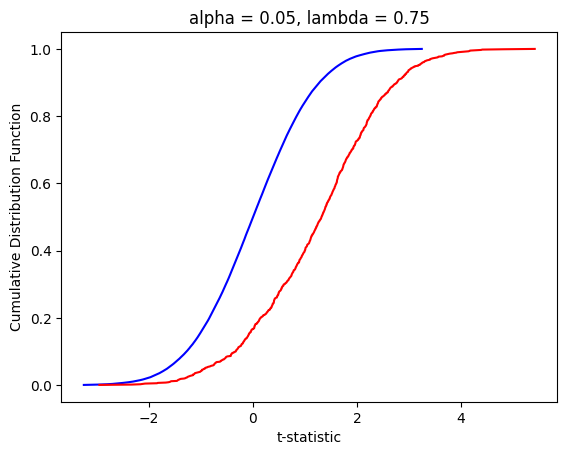

In [ ]:
lam = .75
alph = 0.05
alpha_i = np.concatenate([alph/12*np.ones((1,round(lam*N))), np.zeros((1,round((1-lam)*N)))], axis = 1)
r_i = alpha_i + r_m + eps_i


for i in range(N):
    model = sm.OLS(r_i[:, i], r_m_const)
    results = model.fit()
    alpha[i] = results.params[0]
    beta[i] = results.params[1]
    tstats[i] = results.tvalues[0]
    pvalues[i] = results.pvalues[0]
    residuals[:,i] = results.resid

for b in range(B):
  bs = np.random.choice(range(T), T, replace=True)

  for i in range(N):
    bs_returns[:,i, b] = beta[i]*np.reshape(r_m[bs], (T,)) + residuals[bs, i]


  for i in range(N):
    model = sm.OLS(bs_returns[:, i, b], r_m_const[bs, :])
    results = model.fit()
    alpha_bs[i, b] = results.params[0]
    beta_bs[i, b] = results.params[1]
    tstats_bs[i, b] = results.tvalues[0]
    pvalues_bs[i, b] = results.pvalues[0]
    residuals_bs[:,i, b] = results.resid

bs_t_cdf = np.mean(np.sort(tstats_bs, axis = 0), axis = 1)

plt.plot(bs_t_cdf, (np.arange(N) +1)/N, color = "blue")
plt.plot(np.sort(tstats), (np.arange(N) +1)/N, color = "red")
plt.xlabel('t-statistic')
plt.ylabel('Cumulative Distribution Function')
plt.title('alpha = 0.05, lambda = 0.75')
plt.show()